# EXAMPLE  AutoEncoder_Overfit#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. THe programm looks more like a real application, it just overfits an image with a few iterations and tries to replicate it in the output. ###
#### Network ####
Input(28,28,1) - Conv(3x3) - Out(26,26,convolutionDepth) - TransposedConv(3x3) - Out (28,28,1)  
#### Note ####
It is not really encoding anything since the Encoder output may be larger (depending on convolutionDepth) than the input.  
In some rare occasions (less than 1/5) (probably depending on the initialization) the output turns out a completely black image local minima   
#### Possible Improvements:  
Some smart learning rate decay strategy.


In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.1
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
  

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline 
from skimage import io
trXSub = np.load('sampleImage.npy') 


In [14]:
deepAE = pyb.AutoEncoderExample2(28,28,1,
                               3,3,3,3,3,3,3,3)

this->mInputDims.Height:28 this->mInputDims.Width:28 this->mOutputDims.Height: 26 this->mOutputDims.Width: 26
this->mInputDims.Height:26 this->mInputDims.Width:26 this->mOutputDims.Height: 24 this->mOutputDims.Width: 24
this->mInputDims.Height:24 this->mInputDims.Width:24 this->mOutputDims.Height: 22 this->mOutputDims.Width: 22
this->mInputDims.Height:22 this->mInputDims.Width:22 this->mOutputDims.Height: 20 this->mOutputDims.Width: 20
this->mInputDims.Height:20 this->mInputDims.Width:20 this->mOutputDims.Height: 18 this->mOutputDims.Width: 18
this->mInputDims.Height:18 this->mInputDims.Width:18 this->mOutputDims.Height: 16 this->mOutputDims.Width: 16
this->mInputDims.Height:16 this->mInputDims.Width:16 this->mOutputDims.Height: 14 this->mOutputDims.Width: 14
this->mInputDims.Height:14 this->mInputDims.Width:14 this->mOutputDims.Height: 12 this->mOutputDims.Width: 12
this->mInputDims.Height:12 this->mInputDims.Width:12 this->mOutputDims.Height: 14 this->mOutputDims.Width: 14
this->mInp

In [15]:
deepAE.Train(trXSub,trXSub,0.0001,200)
deepAEOut = deepAE.Test(trXSub)

GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.706819
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615202
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615207
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.061521
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615212
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615212
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615211
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.061521
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615207
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615205
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615203
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615201
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615199
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++

0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.0615196
GetLoss(): ++++++++++++++++++++++++++++++

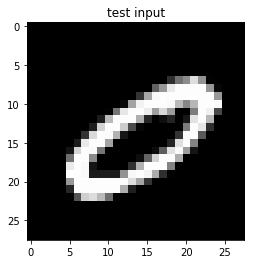

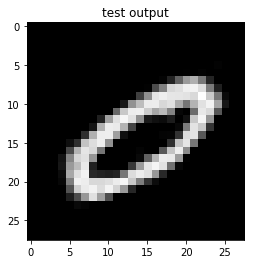

In [11]:
plt.title("test input")
plt.imshow(np.reshape(trXSub,(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()